In [27]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Data preprocessing

In [29]:
# Loading data
df=pd.read_csv('/content/gdrive/MyDrive/18-10-2023/processed_data.csv', warn_bad_lines=True, error_bad_lines=False)

<ipython-input-29-19b7aaefda8d>:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



<ipython-input-29-19b7aaefda8d>:1: FutureWarning:

The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





In [30]:
# Raw data
df

,label,subject,email_to,email_from,message
0,1,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,0,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,1,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,1,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...
...,...,...,...,...,...
75414,1,the reply for your request for a job place [le...,"""Gnitpick"" <gnitpick@flax9.uwaterloo.ca>","""Sydney Car Centre"" <Merrill8783@168city.com>",Content-Type: text/html;\nContent-Transfer-Enc...
75415,1,the reply for your request for a job place [le...,"""Gnitpick"" <gnitpick@flax9.uwaterloo.ca>","""Sydney Car Centre"" <Merrill8783@168city.com>",Content-Type: text/html;\nContent-Transfer-Enc...
75416,0,"Re: [R] Me again, about the horrible documenta...",Duncan Murdoch <murdoch@stats.uwo.ca>,Philippe Grosjean <phgrosjean@sciviews.org>,"For those who are interested, I just cook a li..."
75417,0,Re: [R] RODBC problem,<r-help@stat.math.ethz.ch>,=?iso-8859-1?Q?Bernhard_Wellh=F6fer?=\n\t<Bern...,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan..."


In [31]:
# table structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75419 entries, 0 to 75418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       75419 non-null  int64 
 1   subject     74626 non-null  object
 2   email_to    74843 non-null  object
 3   email_from  75419 non-null  object
 4   message     73932 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [32]:
# finding NaN values
df.isna().sum()

label            0
subject        793
email_to       576
email_from       0
message       1487
dtype: int64

In [33]:
# Droping NaN value
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72798 entries, 0 to 75418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       72798 non-null  int64 
 1   subject     72798 non-null  object
 2   email_to    72798 non-null  object
 3   email_from  72798 non-null  object
 4   message     72798 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [34]:
# Data label count
pie = df['label'].value_counts()
px.pie(names = pie.index,values= pie.values,hole = 0.5,title ='Total Count of label')

In [36]:
# random data sampling
label_1=df[df["label"]==1].sample(n = 2500)
label_0=df[df["label"]==0].sample(n = 2500)
df = pd.concat([label_1,label_0],0)
df

<ipython-input-36-3f06b43f02a9>:3: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,label,subject,email_to,email_from,message
45483,1,borsenparkett,catchall@flax9.uwaterloo.ca,"""DRM Disaster"" <mrdzzqd@terra.cl>","Content-Type: text/html;\n\tcharset=""us-ascii""..."
58736,1,Improve ur sexual life immediately,<ktwarwic@flax9.uwaterloo.ca>,"""Rogert"" <zeroeach@editordefault.com>","Content-Type: text/plain;\n\tcharset=""koi8-r""\..."
64314,1,=?ISO-2022-JP?B?UmU6GyRCPl5MIzR8OEJAWiRsGyhC?=,soundtrackdeficient <soundtrackdeficient@flax9...,fuku oohara <ione@mailfan.net>,2007$BG/BgCmL\$N!Z%G%k%\!(B \n ...
12132,1,Avis Important et Personnel,fa91883d@speedy.uwaterloo.ca,Groupe Desjardins / AccesD <services.de.cartes...,Cher(e) membre \n Desjardins/ A...
65560,1,Order now and don't forget about a discount,<manager@flax9.uwaterloo.ca>,"""Dion Berger"" <immaculatam@immaculata.edu>","We are grateful to all our devoted customers, ..."
...,...,...,...,...,...
31807,0,Re: [SPAM] Re: perl 5.8.8 install problem,Vincent Li <vli@vcn.bc.ca>,"""Kevin W. Gagel"" <gagel@cnc.bc.ca>",----- Original Message -----\n>I think spamd c...
72325,0,[R] generating correlated Bernoulli random var...,r-help@stat.math.ethz.ch,"""Vineet Kumar"" <ivineet@gmail.com>","Hi all,\nI was wondering how to generate sampl..."
1993,0,FNC Alert,BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscrib...,BREAKING NEWS<breakingnews@foxnews.com>,HOUSE JUDICIARY COMMITTEE SUBPOENAS ATTORNEY G...
45443,0,Re: [R] removing all NA rows from a data.frame,Taka Matzmoto <sell_mirage_ne@hotmail.com>,Uwe Ligges <ligges@statistik.uni-dortmund.de>,"Taka Matzmoto wrote:\n> Dear R-users,\n> \n> I..."


In [37]:
# Data after ballencung
pie = df['label'].value_counts()
px.pie(names = pie.index,values= pie.values,hole = 0.5,title ='Total Count of label')

## Feature engineering

In [35]:
df.columns

Index(['label', 'subject', 'email_to', 'email_from', 'message'], dtype='object')

In [38]:
# Concating subject & message
df['message']=df['subject']+" "+df["message"]

In [39]:
# droping column
df=df.drop(['email_to','email_from','subject'],1)
df.head()

<ipython-input-39-05f75d39b905>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,label,message
45483,1,borsenparkett Content-Type: text/html;\n\tchar...
58736,1,Improve ur sexual life immediately Content-Ty...
64314,1,=?ISO-2022-JP?B?UmU6GyRCPl5MIzR8OEJAWiRsGyhC?=...
12132,1,Avis Important et Personnel Cher(e) membre \n ...
65560,1,Order now and don't forget about a discount We...


In [40]:
df=df.reset_index(drop=True)
df.head()

,label,message
0,1,borsenparkett Content-Type: text/html;\n\tchar...
1,1,Improve ur sexual life immediately Content-Ty...
2,1,=?ISO-2022-JP?B?UmU6GyRCPl5MIzR8OEJAWiRsGyhC?=...
3,1,Avis Important et Personnel Cher(e) membre \n ...
4,1,Order now and don't forget about a discount We...


## Data ckeaning using NLP

In [41]:
# creating function for removing punctuation
# For this we need string module
import string

def removing_punctuation(text):
  #Storing punctuation in a veriable
  Punctuation=string.punctuation
  #Changing punctuation with empty string
  trans = str.maketrans('','',Punctuation)
  return text.translate(trans)
#Testing the code
print(df['message'][0])
df['message']= df['message'].apply(removing_punctuation)
print(df['message'][0])


borsenparkett Content-Type: text/html;
	charset="us-ascii"
Content-Transfer-Encoding: quoted-printable Der Mineralbusiness entwickelt sich schnell, HARRIS EXPL ist eine grosse Erganzung zu Ihrer Portefolio! Sehen Sie es am Dienstag, 29. Mai! Firma: Harris Explorations Letzter Preis: 0.45 5-T Prognose: 1.06 +236%! WKN: A0H05Q ISIN: US4145402032 Symbols: WKN: A0H05Q / HXPN.F / EFD Jetzt ist es Zeit um Harris Expl. zu kaufen! Das ist eine Amerikanishe Gesellschaft, die einen grossen Potential hat. Die Chinesische Okonomie und die
Position des Harris Expls ist jetzt im perfektem Zustand. Die Neuigkeite: 30.April Montag: HXPN hat den neuen Gebiet erklaert! Man 
kann Gold und Kupfer dort finden! HXPN wird Gewinnung in ein paar Monaten dort beginnen. Verlieren Sie keine Moglichkeit - kaufen vor es sehr spat wird. Wir konnen 10 000% des Wachsens in 2 Jahren sehen! 236% in folgenden 5 Tagen! Fugen Sie HXPN in Ihre Liste am Dienstag, 29.Mai zu!
borsenparkett ContentType texthtml
	charsetusascii


In [42]:
# removing digits
def remove_digites(text):
  #Storing digites in a veriable
  d='1234567890'
  trans = str.maketrans('','',d)
  #Changing digites with empty string
  return text.translate(trans)
#Testing the code
print(df['message'][0])
df['message']= df['message'].apply(remove_digites)
print(df['message'][0])


borsenparkett ContentType texthtml
	charsetusascii
ContentTransferEncoding quotedprintable Der Mineralbusiness entwickelt sich schnell HARRIS EXPL ist eine grosse Erganzung zu Ihrer Portefolio Sehen Sie es am Dienstag 29 Mai Firma Harris Explorations Letzter Preis 045 5T Prognose 106 236 WKN A0H05Q ISIN US4145402032 Symbols WKN A0H05Q  HXPNF  EFD Jetzt ist es Zeit um Harris Expl zu kaufen Das ist eine Amerikanishe Gesellschaft die einen grossen Potential hat Die Chinesische Okonomie und die
Position des Harris Expls ist jetzt im perfektem Zustand Die Neuigkeite 30April Montag HXPN hat den neuen Gebiet erklaert Man 
kann Gold und Kupfer dort finden HXPN wird Gewinnung in ein paar Monaten dort beginnen Verlieren Sie keine Moglichkeit  kaufen vor es sehr spat wird Wir konnen 10 000 des Wachsens in 2 Jahren sehen 236 in folgenden 5 Tagen Fugen Sie HXPN in Ihre Liste am Dienstag 29Mai zu
borsenparkett ContentType texthtml
	charsetusascii
ContentTransferEncoding quotedprintable Der Mineralbu

In [43]:
#Stop-word and common word removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
swords=stopwords.words('english')
def remove_stopwords(text):
    return " ".join([word.lower() for word in str(text).split() if word not in swords])
print(df['message'][0])
df['message']= df['message'].apply(remove_stopwords)
print(df['message'][0])

borsenparkett ContentType texthtml
	charsetusascii
ContentTransferEncoding quotedprintable Der Mineralbusiness entwickelt sich schnell HARRIS EXPL ist eine grosse Erganzung zu Ihrer Portefolio Sehen Sie es am Dienstag  Mai Firma Harris Explorations Letzter Preis  T Prognose   WKN AHQ ISIN US Symbols WKN AHQ  HXPNF  EFD Jetzt ist es Zeit um Harris Expl zu kaufen Das ist eine Amerikanishe Gesellschaft die einen grossen Potential hat Die Chinesische Okonomie und die
Position des Harris Expls ist jetzt im perfektem Zustand Die Neuigkeite April Montag HXPN hat den neuen Gebiet erklaert Man 
kann Gold und Kupfer dort finden HXPN wird Gewinnung in ein paar Monaten dort beginnen Verlieren Sie keine Moglichkeit  kaufen vor es sehr spat wird Wir konnen   des Wachsens in  Jahren sehen  in folgenden  Tagen Fugen Sie HXPN in Ihre Liste am Dienstag Mai zu


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


borsenparkett contenttype texthtml charsetusascii contenttransferencoding quotedprintable der mineralbusiness entwickelt sich schnell harris expl ist eine grosse erganzung zu ihrer portefolio sehen sie es dienstag mai firma harris explorations letzter preis t prognose wkn ahq isin us symbols wkn ahq hxpnf efd jetzt ist es zeit um harris expl zu kaufen das ist eine amerikanishe gesellschaft die einen grossen potential hat die chinesische okonomie und die position des harris expls ist jetzt im perfektem zustand die neuigkeite april montag hxpn hat den neuen gebiet erklaert man kann gold und kupfer dort finden hxpn wird gewinnung ein paar monaten dort beginnen verlieren sie keine moglichkeit kaufen vor es sehr spat wird wir konnen des wachsens jahren sehen folgenden tagen fugen sie hxpn ihre liste dienstag mai zu


In [46]:
# Stemming and lemmatization
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
lemma=WordNetLemmatizer()
ps=PorterStemmer()

def equalizer(text):
    word_list=[]
    for word in str(text).split():
      w=lemma.lemmatize(word)
      w=ps.stem(w)
      word_list.append(w)
    return " ".join(word_list)
print(df['message'][0])
df['message']= df['message'].apply(equalizer)
print(df['message'][0])

borsenparkett contenttype texthtml charsetusascii contenttransferencoding quotedprintable der mineralbusiness entwickelt sich schnell harris expl ist eine grosse erganzung zu ihrer portefolio sehen sie es dienstag mai firma harris explorations letzter preis t prognose wkn ahq isin us symbols wkn ahq hxpnf efd jetzt ist es zeit um harris expl zu kaufen das ist eine amerikanishe gesellschaft die einen grossen potential hat die chinesische okonomie und die position des harris expls ist jetzt im perfektem zustand die neuigkeite april montag hxpn hat den neuen gebiet erklaert man kann gold und kupfer dort finden hxpn wird gewinnung ein paar monaten dort beginnen verlieren sie keine moglichkeit kaufen vor es sehr spat wird wir konnen des wachsens jahren sehen folgenden tagen fugen sie hxpn ihre liste dienstag mai zu


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


borsenparkett contenttyp texthtml charsetusascii contenttransferencod quotedprint der mineralbusi entwickelt sich schnell harri expl ist ein gross erganzung zu ihrer portefolio sehen sie e dienstag mai firma harri explor letzter prei t prognos wkn ahq isin u symbol wkn ahq hxpnf efd jetzt ist e zeit um harri expl zu kaufen da ist ein amerikanish gesellschaft die einen grossen potenti hat die chinesisch okonomi und die posit de harri expl ist jetzt im perfektem zustand die neuigkeit april montag hxpn hat den neuen gebiet erklaert man kann gold und kupfer dort finden hxpn wird gewinnung ein paar monaten dort beginnen verlieren sie kein moglichkeit kaufen vor e sehr spat wird wir konnen de wachsen jahren sehen folgenden tagen fugen sie hxpn ihr list dienstag mai zu


## Vectorizing Text Data

In [47]:
# Usinh count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(df['message'])
print(df['message'][0])
vectorizer.transform([df['message'][0]]).toarray().shape


borsenparkett contenttyp texthtml charsetusascii contenttransferencod quotedprint der mineralbusi entwickelt sich schnell harri expl ist ein gross erganzung zu ihrer portefolio sehen sie e dienstag mai firma harri explor letzter prei t prognos wkn ahq isin u symbol wkn ahq hxpnf efd jetzt ist e zeit um harri expl zu kaufen da ist ein amerikanish gesellschaft die einen grossen potenti hat die chinesisch okonomi und die posit de harri expl ist jetzt im perfektem zustand die neuigkeit april montag hxpn hat den neuen gebiet erklaert man kann gold und kupfer dort finden hxpn wird gewinnung ein paar monaten dort beginnen verlieren sie kein moglichkeit kaufen vor e sehr spat wird wir konnen de wachsen jahren sehen folgenden tagen fugen sie hxpn ihr list dienstag mai zu


(1, 136487)

In [53]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'],1), df['label'], test_size=0.3, random_state=55)

<ipython-input-53-edb8ef67a1e4>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [54]:
X_train=vectorizer.transform(X_train['message']).toarray()
X_test=vectorizer.transform(X_test['message']).toarray()

# Model building

## GaussianNB

In [75]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Training Data
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [76]:
# GaussianNB accuracy score
from sklearn.metrics import accuracy_score
print(f'GaussianNB accuracy score: {accuracy_score(y_test, y_pred)}')

GaussianNB accuracy score: 0.9053333333333333


[Text(0.5, 1.0, 'GaussianNB')]

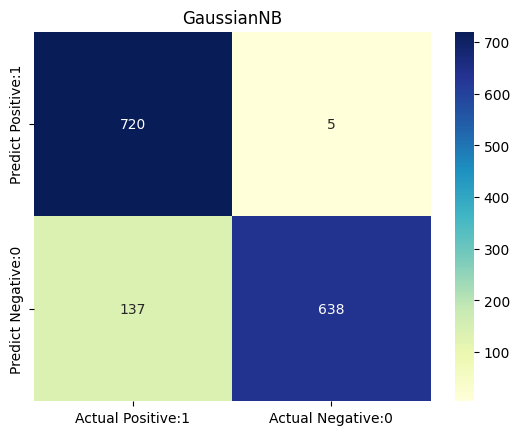

In [88]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='GaussianNB')

In [78]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       725
           1       0.99      0.82      0.90       775

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.90      1500



## MultinomialNB

In [74]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)

In [79]:
# MultinomialNB accuracy score
print(f'MultinomialNB accuracy score: {accuracy_score(y_test, mnb_y_pred)}')

GaussianNB accuracy score: 0.934


[Text(0.5, 1.0, 'MultinomialNB')]

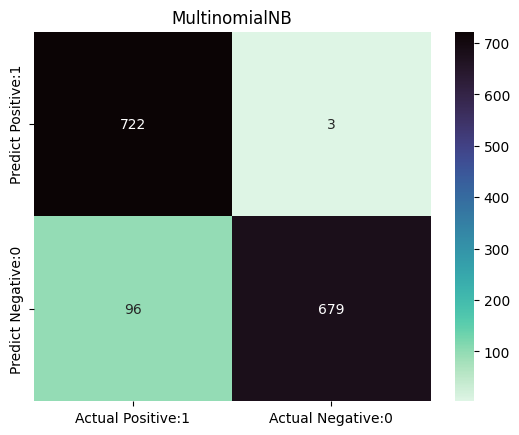

In [87]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, mnb_y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako_r').set(title='MultinomialNB')

In [82]:
# classification report
print(classification_report(y_test, mnb_y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       725
           1       1.00      0.88      0.93       775

    accuracy                           0.93      1500
   macro avg       0.94      0.94      0.93      1500
weighted avg       0.94      0.93      0.93      1500

